# Nasa - Asteroids classification

Esse notebook faz parte do trabalho da disciplina de Arquitetura de dados, ministrado pelo Prof. Dr. Dieval Guizelini, do curso de Pós Graduação em Inteligência Artificial Aplicada da UFPR.

O objetivo é aplicar técnicas de pré processamento de dados com a finalidade de melhorar a primeira classificação feita sem tais técnicas.

Usaremos a base de classificação de asteróides presente em: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification.

**Alunos:** Luiza R. Marinho e Tiago J. da Silva

---

## 1. Para começar

### Leitura da base

In [93]:
import pandas as pd

In [94]:
neo_df = pd.read_csv('nasa-asteroides-database.csv', sep = ',', engine = 'python', 
                            parse_dates=['Close Approach Date', 'Orbit Determination Date'])

In [95]:
neo_df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
0               0.079051               0.176763            417.388066   
1               0.090762               0.202951            479.225620   
2               0.143849               0.321655            759.521423   
3               0.005469               0.012229             28.876199   
4               0.079051               0.176763            417.388066   

   Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  \
0            933.308089          1995-01-01               788947200000   
1           1071.581063          1995-01-01               788947200000   
2           1698.341531          1995-01-08               789552000000   
3             64.569144          1995-01-15               790156800000   
4            933.308089          1995-01-15               790156800000   

   Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  \
0                      6.115834                 22017.003799    13680.509944   
1                     18.113985                 65210.346095    40519.173105   
2                      7.590711                 27326.560182    16979.661798   
3                     11.173874                 40225.948191    24994.839864   
4                      9.840831                 35426.991794    22012.954985   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                  0.419483         163.178711              62753692.0   
1                  0.383014         148.992630              57298148.0   
2                  0.050956          19.821890               7622911.5   
3                  0.285322         110.990387              42683616.0   
4                  0.407832         158.646713              61010824.0   

   Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  \
0         38993336.0         Earth        17      2017-04-06 08:36:37   
1         35603420.0         Earth        21      2017-04-06 08:32:49   
2          4736657.5         Earth        22      2017-04-06 09:20:19   
3         26522368.0         Earth         7      2017-04-06 09:15:49   
4         37910368.0         Earth        25      2017-04-06 08:57:58   

   Orbit Uncertainity  Minimum Orbit Intersection  \
0                   5                    0.025282   
1                   3                    0.186935   
2                   0                    0.043058   
3                   6                    0.005512   
4                   1                    0.034798   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                        4.634         2458000.5      0.425549   
1                        5.457         2458000.5      0.351674   
2                        4.557         2458000.5      0.348248   
3                        5.093         2458000.5      0.216578   
4                        5.154         2458000.5      0.210448   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0         1.407011     6.025981          314.373913      609.599786   
1         1.107776    28.412996          136.717242      425.869294   
2         1.4

### Análise descritiva

In [ ]:
neo_df.info()

#### Atributos: Definições e tipos de dados

| Atributo | Definição* | Tipo de dado |
| :--- | :--- | :--- |
| Neo Reference ID | Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth| Nominal |
| Name | 'Name' of asteroid (same as NEO Reference ID) | Nominal |
| Absolute Magnitude | A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees) | Nominal |
| Est Dia in KM(min) | Minimum estimated diameter of the asteroid in KM | Nominal |
| Est Dia in KM(max) | Maximum estimated diameter of the asteroid in KM | Nominal |
| Est Dia in M(min) | Minimum estimated diameter of the asteroid in M | Nominal |
| Est Dia in M(max) | Maximum estimated diameter of the asteroid in M | Nominal |
| Est Dia in Miles(min) | Minimum estimated diameter of the asteroid in Miles | Nominal |
| Est Dia in Miles(max) | Maximum estimated diameter of the asteroid in Miles | Nominal |
| Est Dia in Feet(min) | Minimum estimated diameter of the asteroid in Feet | Nominal |
| Est Dia in Feet(max) | Maximum estimated diameter of the asteroid in Feet | Nominal |
| Close Approach Date | Date at which the asteroid approaches close to Earth | Nominal |
| Epoch Date Close Approach | Date at which the asteroid approaches close to Earth (in epoch time) | Nominal |
| Relative Velocity km per sec | Asteroid's velocity relative to earth in km per sec | Nominal |
| Relative Velocity km per hr | Asteroid's velocity relative to earth in km per hr | Nominal |
| Miles per hour | Asteroid's velocity relative to earth in miles per hour | Nominal |
| Miss Dist.(Astronomical) | Distance by which the asteroid misses Earth in astronomical | Nominal |
| Miss Dist.(lunar) | Distance by which the asteroid misses Earth in lunar | Nominal |
| Miss Dist.(kilometers) | Distance by which the asteroid misses Earth in km) | Nominal |
| Miss Dist.(miles) | Distance by which the asteroid misses Earth in miles | Nominal |
| Orbiting Body | Name of orbited body | Nominal |
| Orbit ID | An ID of JPL NEA orbit that JPL Nasa uses in its analysis | Nominal |
| Orbit Determination Date | Date at which the asteroid's orbit was determined | Nominal |
| Orbit Uncertainity | A measure of the uncertainity ('measurement errors') in the calculated orbit | Nominal |
| Minimum Orbit Intersection | The closest distance between Earth and the asteroid in their respective orbits (in astronomical units) | Nominal |
| Jupiter Tisserand Invariant | A value used to differentiate between asteroids and Jupiter-family comets | Nominal |
| Epoch Osculation | The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified | Nominal |
| Eccentricity | A value which specifies by how much the asteroid's orbit deviates from a perfect circle | Nominal |
| Semi Major Axis | The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun) | Nominal |
| Inclination | Measures the tilt of the asteroid's orbit around the Sun | Nominal |
| Asc Node Longitude | (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node' | Nominal |
| Orbital Period | Time taken for asteroid to complete a single orbit around the Sun | Nominal |
| Perihelion Distance | Distance of point in asteroid's orbit which is closest to the Sun | Nominal |
| Perihelion Arg | (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit' | Nominal |
| Aphelion Dist | Distance of point in asteroid's orbit which is farthest from the Sun | Nominal |
| Perihelion Time | Length of time of asteroid's passage through the perihelion stage | Nominal |
| Mean Anomaly | (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage') | Nominal |
| Mean Motion | (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis' | Nominal |
| Equinox | An astronomical standard to measure against (currently 'J2000.0') | Nominal |
| Hazardous | Is the asteroid hazardous? (True or False) | Nominal |

*Fonte: https://www.kaggle.com/kaggleuser654/is-the-asteroid-hazardous

- **Quantidade de atributos:** 40
- **Quantidade de classes:** 2
- **Classes:** True e False (Hazardous)
- **Quantidade de padrões:** 4686 

#### Padrões por classe:

In [48]:
neo_df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

#### Estatísticas

In [49]:
neo_df.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       Est Dia in Feet(max)  Epoch Date Close Approach  \
count           4687.000000               4.687000e+03   
mean            1501.013521               1.179881e+12   
std             2711.257465               1.981540e+11   
min                7.413530               7.889472e+11   
25%              245.485039               1.015574e+12   
50%              812.877364               1.203062e+12   
75%             1862.194459               1.355558e+12   
max           114294.420501               1.473318e+12   

       Relative Velocity km per sec  Relative Velocity km per hr  \
count                   4687.000000                  4687.000000   
mean                      13.970811                 50294.919829   
std                        7.293223                 26255.601377   
min                        0.335504                  1207.814804   
25%                        8.432865                 30358.313370   
50%                       12.917889                 46504.401181   
75%                       18.077649                 65079.535405   
max                       44.633747                160681.487851   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count     4687.000000               4687.000000        4687.000000   
mean     31251.307268                  0.256778          99.886706   
std      16314.209644                  0.145798          56.715493   
min        750.489149                  0.000178           0.069194   
25%      18863.475327                  0.133420          51.900211   
50%      28896.026390                  0.265029         103.096123   
75%      40437.892430                  0.384154         149.435921   
max      99841.227826                  0.499884         194.454910   

       Miss Dist.(kilometers)  Miss Dist.(miles)     Orbit ID  \
count            4.687000e+03       4.687000e+03  4687.000000   
mean             3.841347e+07       2.386902e+07    28.300619   
std              

#### Relação entre atributos

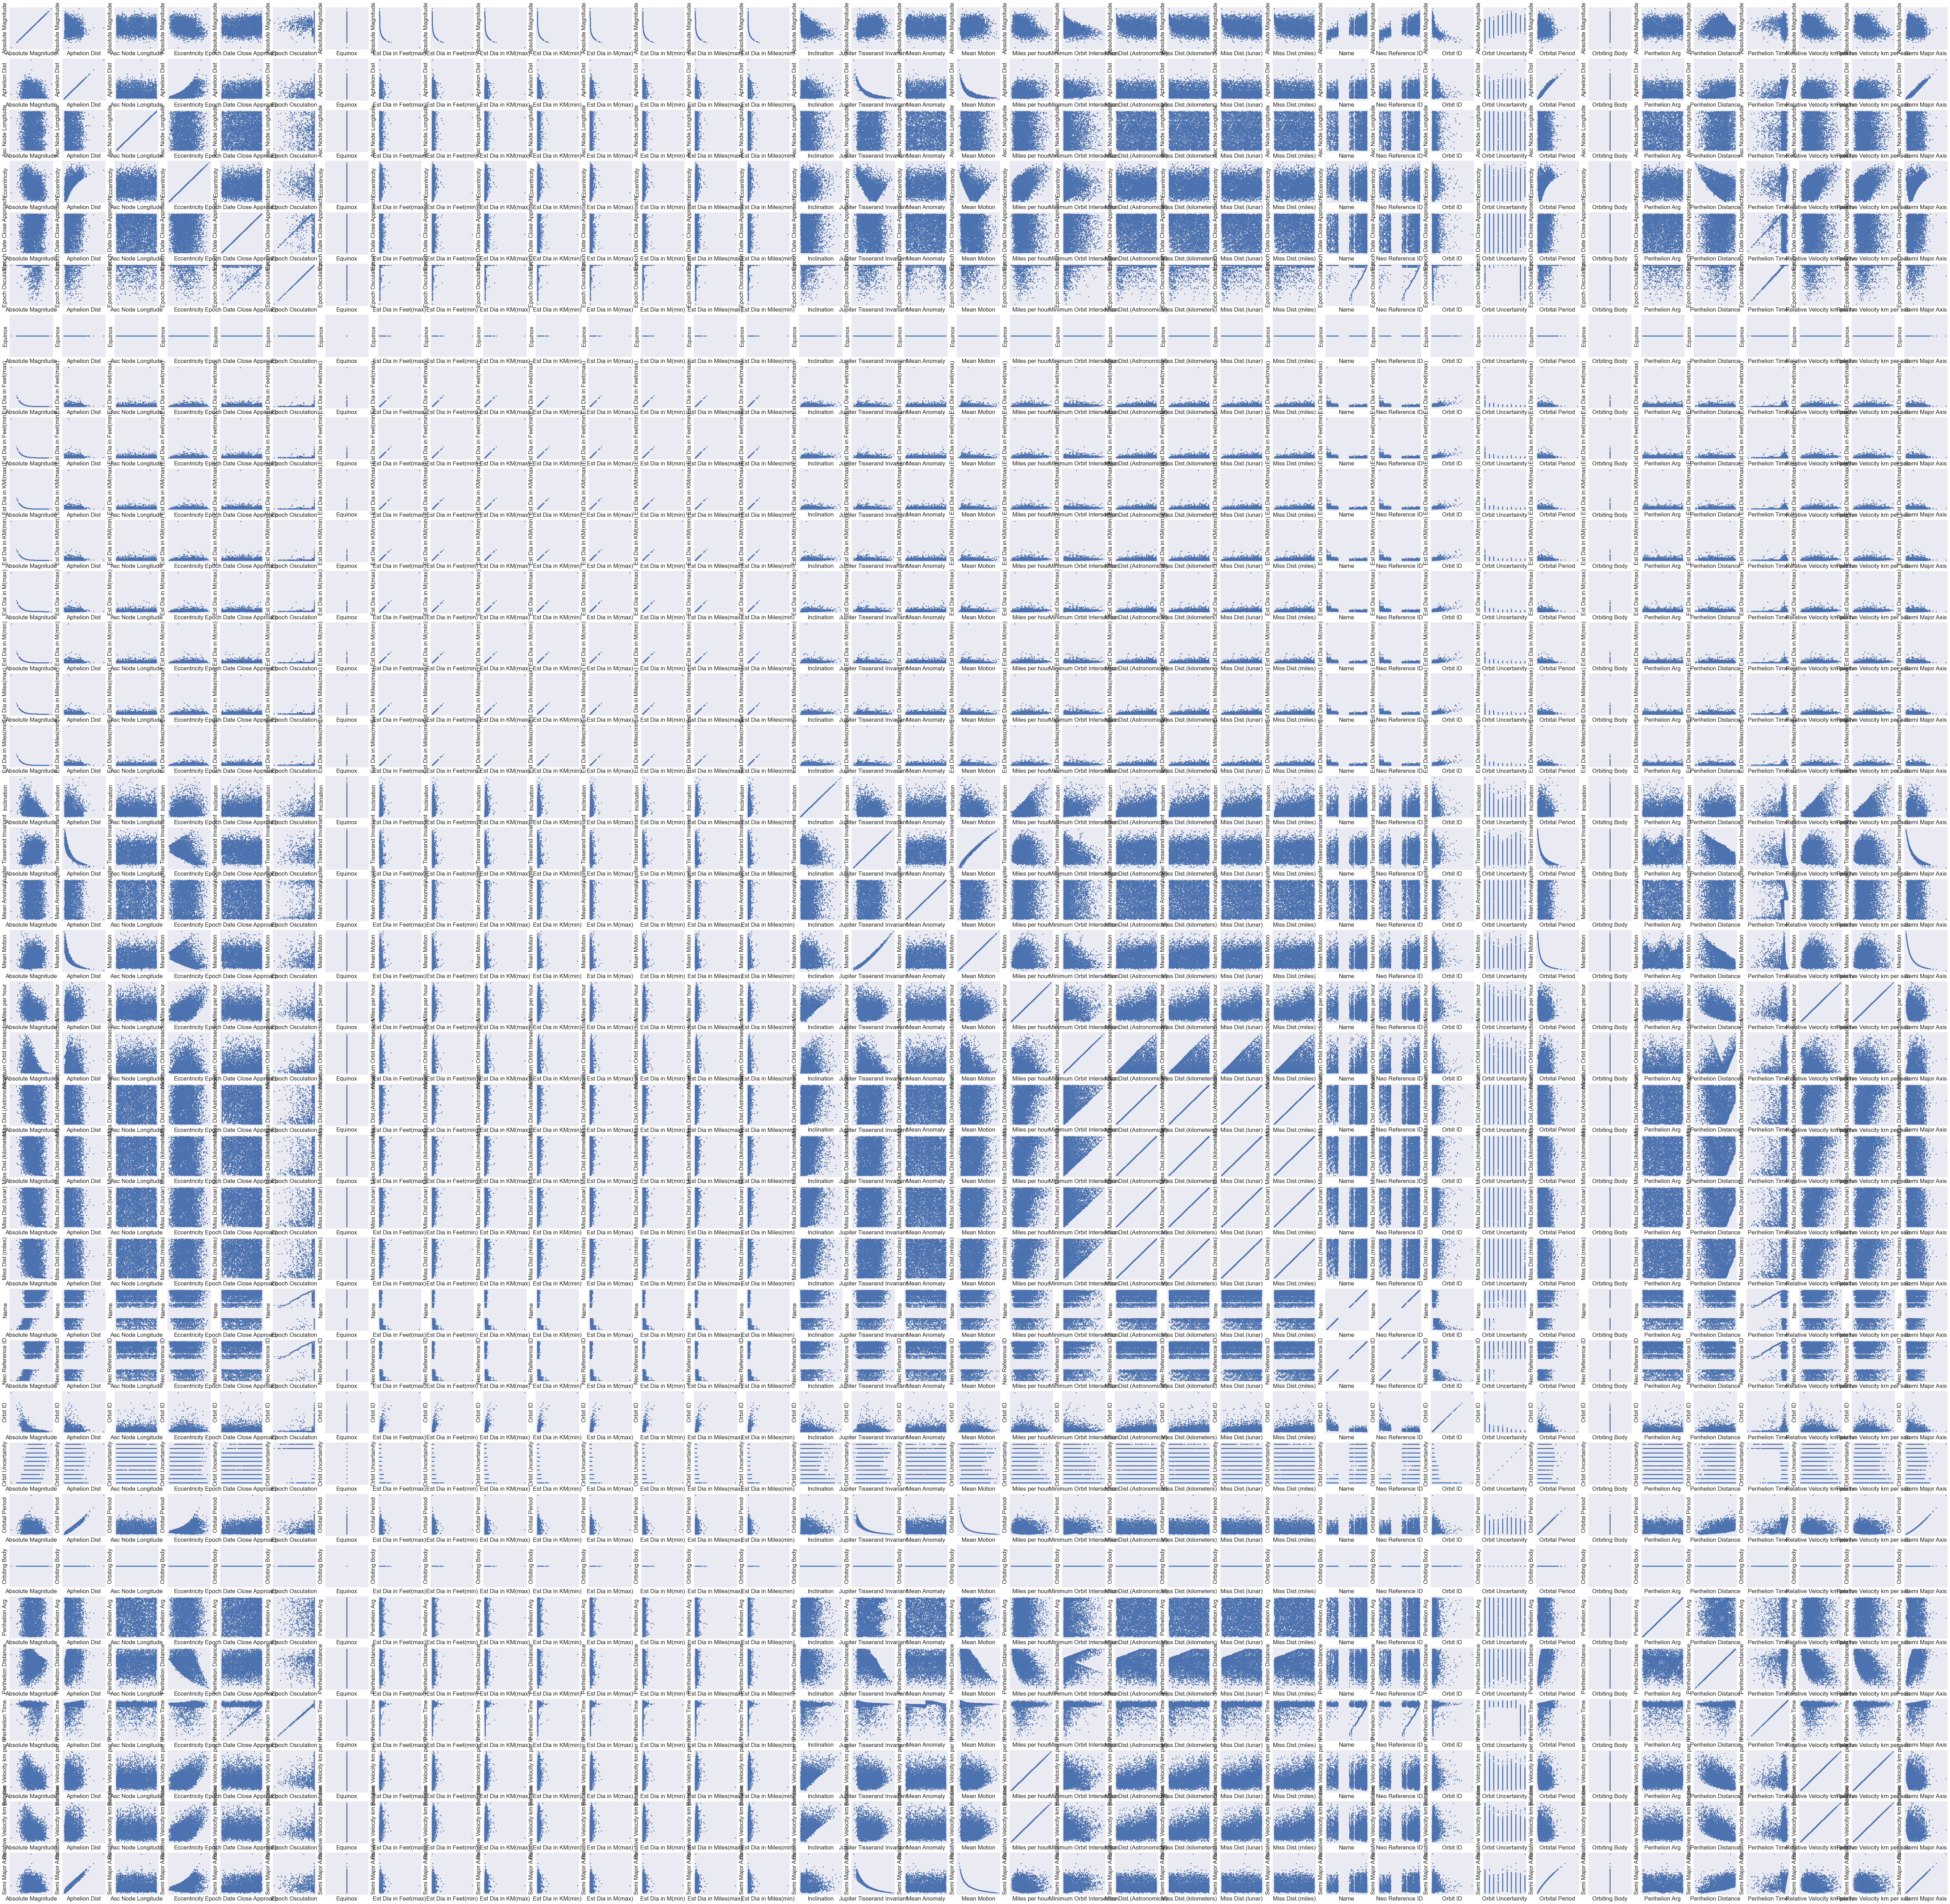

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

colunas = list(neo_df.head())
colunas = colunas[0:-1]
nomeColunas = sorted(colunas) 
numColunas = len(nomeColunas)
fig, ax = plt.subplots(numColunas, numColunas, figsize=(100, 100), constrained_layout = False)

for lin in range(0, numColunas):
    for col in range(0,numColunas): 
        ax[lin,col].scatter(x = neo_df[nomeColunas[col]], y = neo_df[nomeColunas[lin]],s = 4) 
        ax[lin,col].set(xticks = [], yticks = [], xlabel = nomeColunas[col], ylabel = nomeColunas[lin])
        
plt.show()

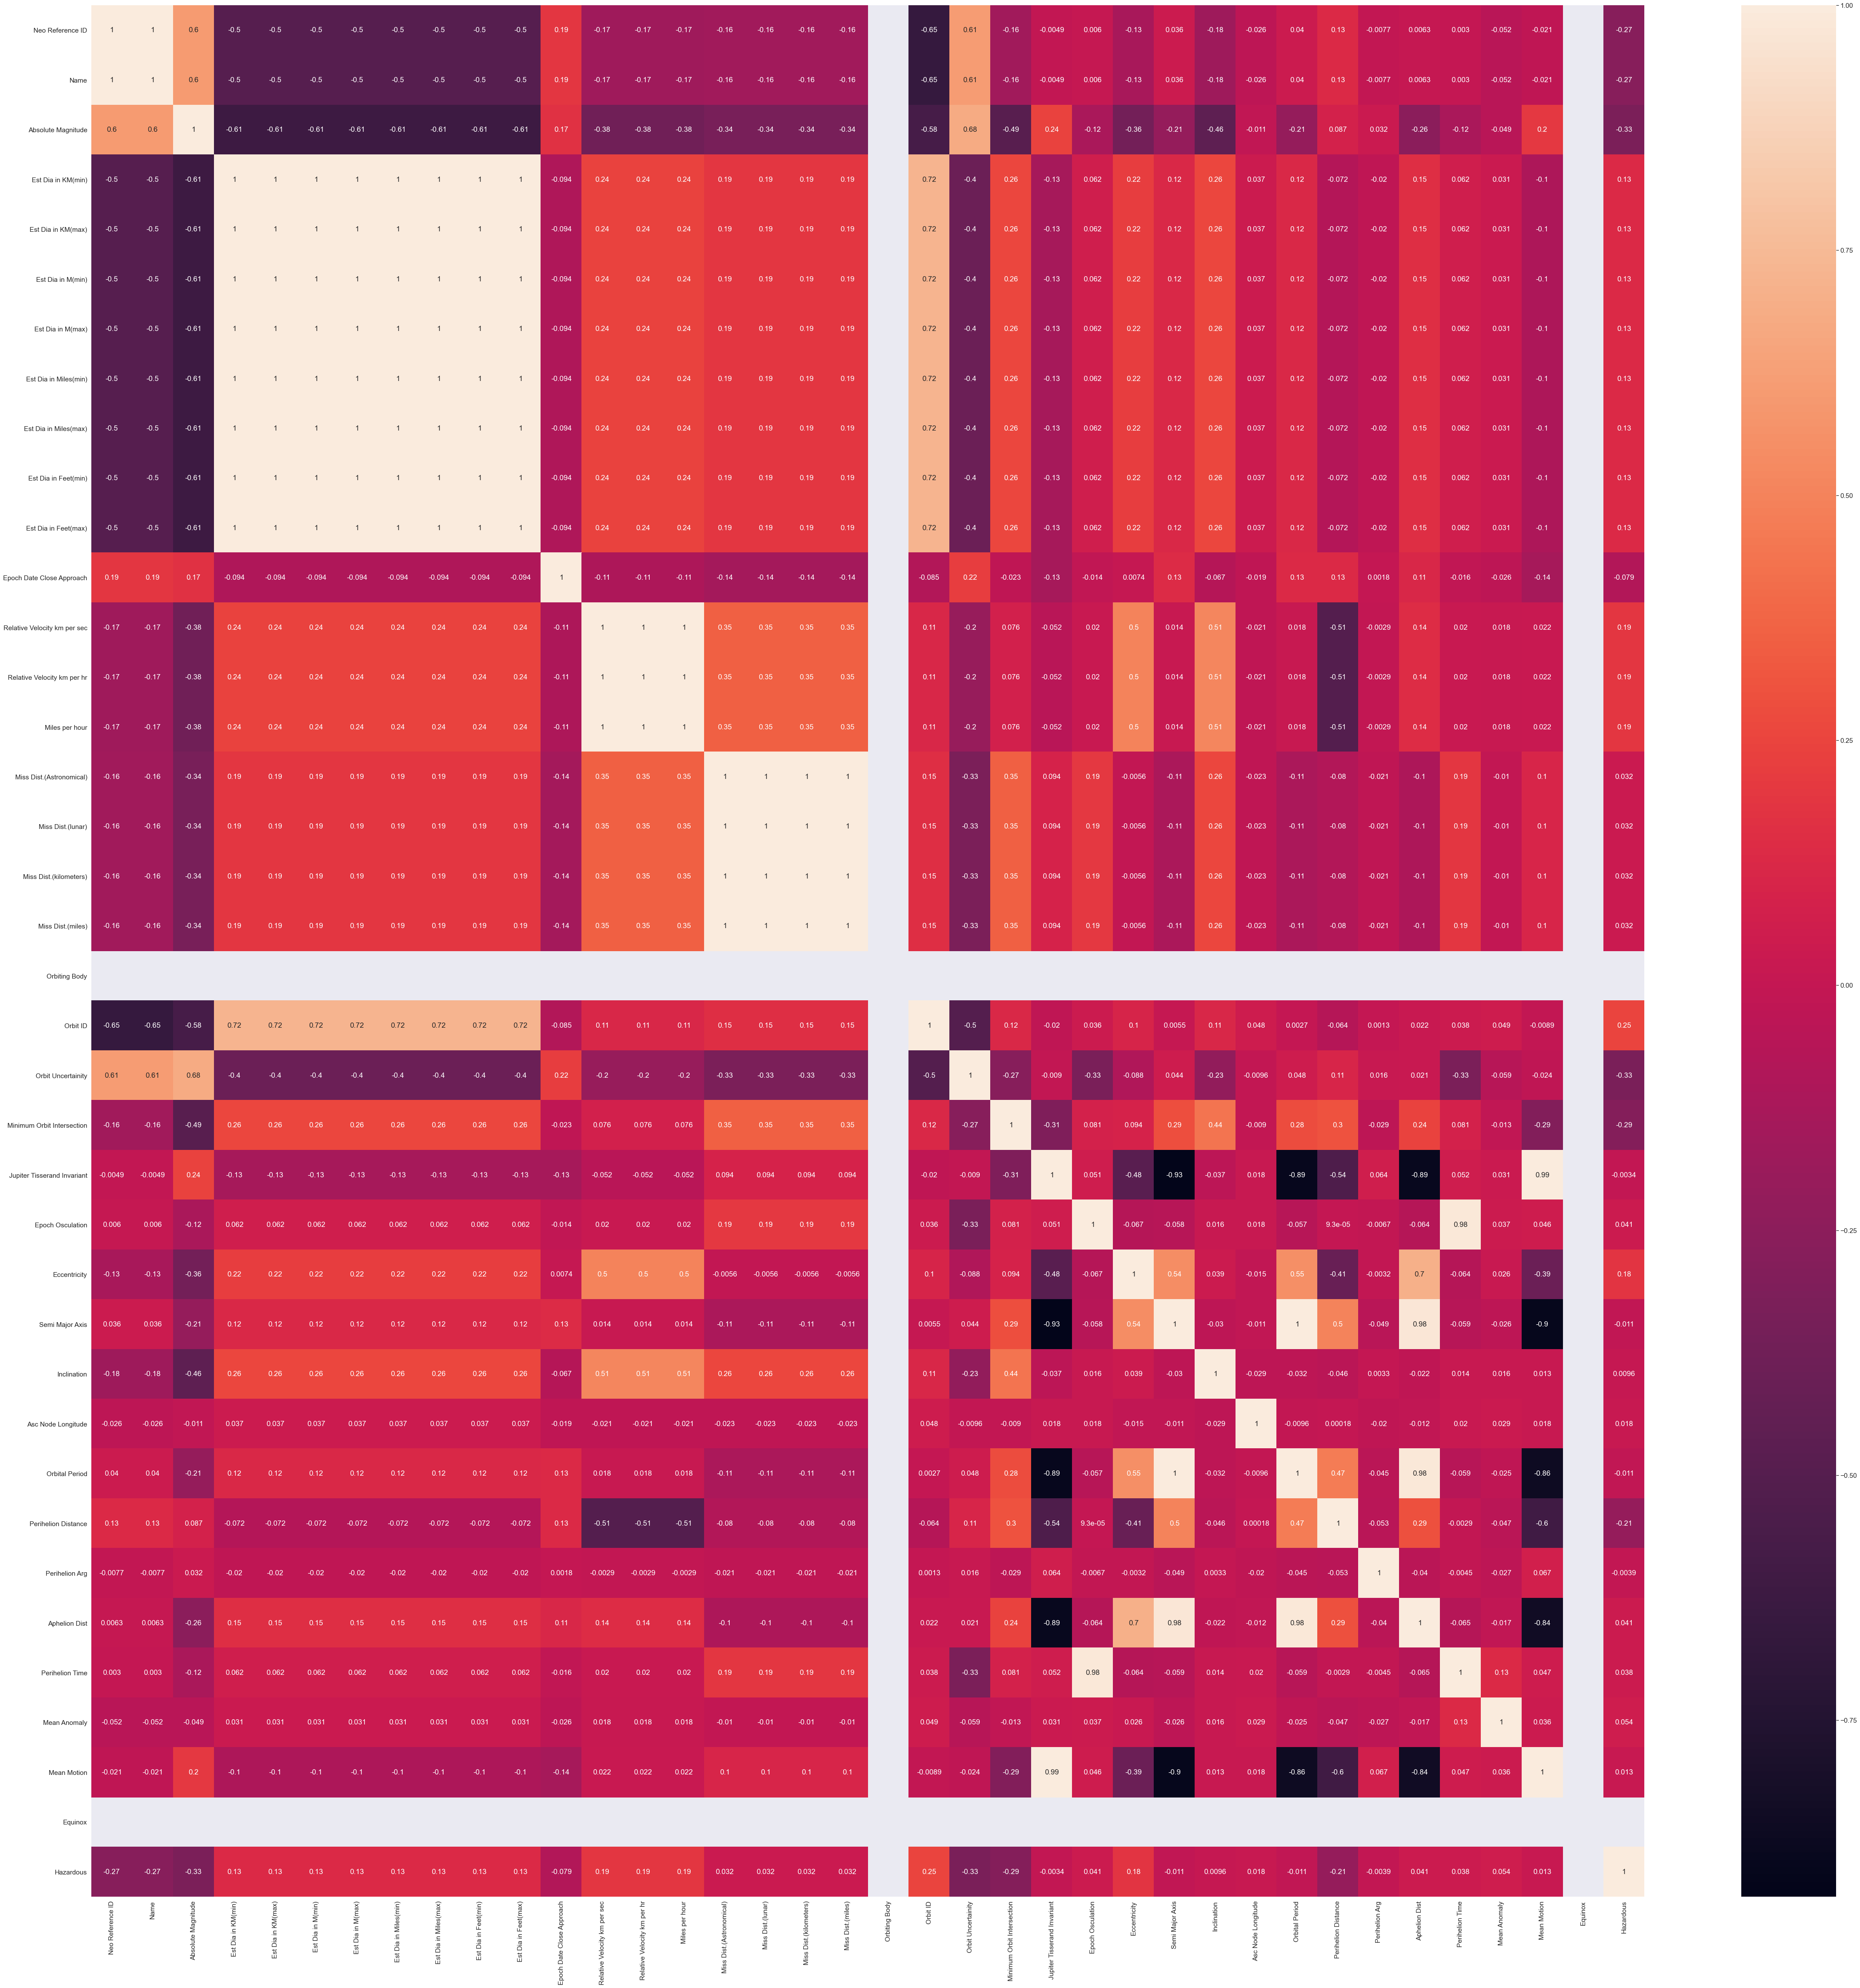

In [67]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None) 
corr = neo_df.corr()

plt.subplots(figsize=(80, 80)) 
sn.heatmap(corr, annot = True) 
plt.show()

------

## 2. Primeira classificação

#### Definindo as features

In [50]:
features = neo_df.columns.tolist()
features = features[0:-1]
pd.DataFrame({'Feature':features})

Feature
0               Neo Reference ID
1                           Name
2             Absolute Magnitude
3             Est Dia in KM(min)
4             Est Dia in KM(max)
5              Est Dia in M(min)
6              Est Dia in M(max)
7          Est Dia in Miles(min)
8          Est Dia in Miles(max)
9           Est Dia in Feet(min)
10          Est Dia in Feet(max)
11           Close Approach Date
12     Epoch Date Close Approach
13  Relative Velocity km per sec
14   Relative Velocity km per hr
15                Miles per hour
16      Miss Dist.(Astronomical)
17             Miss Dist.(lunar)
18        Miss Dist.(kilometers)
19             Miss Dist.(miles)
20                 Orbiting Body
21                      Orbit ID
22      Orbit Determination Date
23            Orbit Uncertainity
24    Minimum Orbit Intersection
25   Jupiter Tisserand Invariant
26              Epoch Osculation
27                  Eccentricity
28               Semi Major Axis
29                   Inclination
30            Asc Node Longitude
31                Orbital Period
32           Perihelion Distance
33                Perihelion Arg
34                 Aphelion Dist
35               Perihelion Time
36                  Mean Anomaly
37                   Mean Motion
38                       Equinox

#### Separação de dados entre Treino e Teste

In [51]:
from sklearn.model_selection import train_test_split 

neo_features_df = neo_df.iloc[:,:-1]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.3, random_state = 1)

#### Classificação

In [52]:
from sklearn import svm

clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

#### Por que não foi possível classificar?

Precisaremos adaptar minimamente os dados pois a classificador que usaremos, o SVM, aceita apenas números além da classe. No nosso dataframe temos dois campos categóricos além da classe: **Orbiting Body** e **Equinox**. Além deles há dois campos que armazenam datas: **Orbit Determination Date** e **Close Approach Date**.

Para solucionar isso iremos:

- Remover os campos de data
- Converter os valores categórios em valores numéricos.

#### Remoção dos campos de data

In [53]:
neo_df.drop('Orbit Determination Date', 1, inplace = True)
neo_df.drop('Close Approach Date', 1, inplace = True)

#### Conversão dos valores categóricos em valores numéricos

In [54]:
orbiting_body_factor = pd.factorize(neo_df['Orbiting Body'])
equinox_factor = pd.factorize(neo_df['Equinox'])

In [56]:
neo_df['Orbiting Body'] = orbiting_body_factor[0]
neo_df['Equinox'] = equinox_factor[0]

#### Geração da lista de features

In [57]:
features = neo_df.columns.tolist()
features = features[0:-1]

#### Separação de dados entre Treino e Teste

In [58]:
neo_features_df = neo_df.iloc[:,:-1]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.3, random_state = 1)

#### Classificação

In [59]:
clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

#### Métricas

##### Matriz de confusão

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes_test, predicted)

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

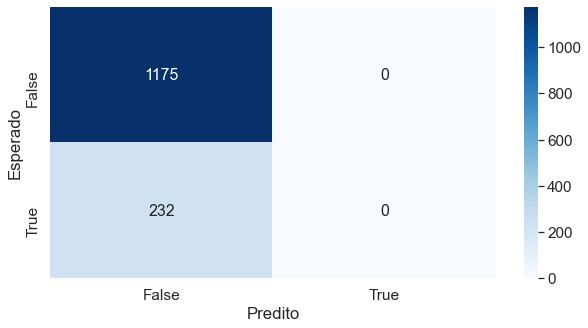

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10,5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

##### Report classification

In [62]:
from sklearn import metrics

print(metrics.classification_report(classes_test, predicted, zero_division = False))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1175
        True       0.00      0.00      0.00       232

    accuracy                           0.84      1407
   macro avg       0.42      0.50      0.46      1407
weighted avg       0.70      0.84      0.76      1407



##### Acurácia

In [65]:
np.mean(predicted == classes_test)

0.8351101634683724

-----

## 3. Pré-processamento

### Codificação

In [114]:
neo_df['Hazardous'].replace({True: 1, False: 0}, inplace = True)
neo_df['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

### Seleção de dados

NASA'a CNEOS defines petentially hazardous asteroids as an asteroid with "a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less". Note: 1 au (astronomical unit) = 149597870700 m (roughly distance between Earth and Sun)

We will plot Minimum Orbit Intersection, Absolute Magnitude, and Hazardous in a scatter plot to see this relationship.

In [96]:
neo_df = neo_df[['Absolute Magnitude', 'Minimum Orbit Intersection', 'Hazardous']]

In [115]:
neo_df.head()

Absolute Magnitude  Minimum Orbit Intersection  absolute_magnitude_scaled  \
0                21.6                    0.025282                  -0.068182   
1                21.3                    0.186935                  -0.136364   
2                20.3                    0.043058                  -0.363636   
3                27.4                    0.005512                   1.250000   
4                21.6                    0.034798                  -0.068182   

   minimum_orbit_intersection_scaled  Hazardous  
0                          -0.202586          1  
1                           1.280355          0  
2                          -0.039516          1  
3                          -0.383949          0  
4                          -0.115289          1

### Normalização

In [102]:
from sklearn.preprocessing import robust_scale

neo_df['absolute_magnitude_scaled'] = robust_scale(neo_df['Absolute Magnitude'])
neo_df['minimum_orbit_intersection_scaled'] = robust_scale(neo_df['Minimum Orbit Intersection'])
neo_df = neo_df[[
        'Absolute Magnitude', 
        'Minimum Orbit Intersection', 
        'absolute_magnitude_scaled',
        'minimum_orbit_intersection_scaled',
        'Hazardous'
    ]]

In [103]:
neo_df.head()

Absolute Magnitude  Minimum Orbit Intersection  absolute_magnitude_scaled  \
0                21.6                    0.025282                  -0.068182   
1                21.3                    0.186935                  -0.136364   
2                20.3                    0.043058                  -0.363636   
3                27.4                    0.005512                   1.250000   
4                21.6                    0.034798                  -0.068182   

   minimum_orbit_intersection_scaled  Hazardous  
0                          -0.202586       True  
1                           1.280355      False  
2                          -0.039516       True  
3                          -0.383949      False  
4                          -0.115289       True

### Nova classificação

In [116]:
features = ['absolute_magnitude_scaled', 'minimum_orbit_intersection_scaled']

In [123]:
neo_features_df = neo_df[features]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.3, random_state = 1)

In [124]:
clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

#### Métricas

##### Matriz de confusão

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

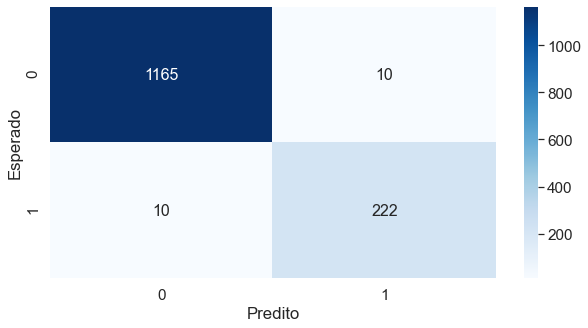

In [125]:
cm = confusion_matrix(classes_test, predicted)

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10, 5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

#### Report Classification

In [126]:
print(metrics.classification_report(classes_test, predicted, zero_division = False))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.96      0.96      0.96       232

    accuracy                           0.99      1407
   macro avg       0.97      0.97      0.97      1407
weighted avg       0.99      0.99      0.99      1407



##### Acurácia

In [127]:
np.mean(predicted == classes_test)

0.9857853589196873

## Todos

- Preencher os tipos de dados (1 - Luiza)

- Fazer as etapas de pré processamento (2 - Tiago)
- - Normalização
- - Codificação
- - Escolha de features

- Analisar se precisamos fazer algo pra corrigir o problema de prevalência (3 - Luiza)

- Fazer o back-propagation e forward-propagation pra comparar (4)

- Analisar os gráficos q estamos usando (5)